# Download Data from kaggle

In [ ]:
import os

# Configure kaggle
os.chdir('/root/')
!mkdir -p .kaggle
os.chdir('/root/.kaggle')
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Y-o0TVcjehM8SZB3Nt8U3xkyeQu-Nse-' -O kaggle.json > /dev/null 2>&1
!ls /root/.kaggle

# Set permissions 
!chmod 600 /root/.kaggle/kaggle.json

# Create data folder
os.chdir('/content/')
!rm -rf data
!mkdir data
os.chdir('data')
!pwd

# Download data
!pip install -q kaggle
! kaggle datasets download jonathanoheix/face-expression-recognition-dataset

# Unzip data
!unzip *.zip 

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/f

# Importing Required Libraries

In [ ]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 20 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=18ce88324b7d1cd548f0c1107c976b7be266417e8dd4b8f113dd78c58707c8b1
  Stored in directory: /root/.cache/pip/wheels/b4/4b/8f/751e99d45f089bdf366a7d3e5066db3c2b84a62e4377f534d7
Successfully built face-recognition-models


In [ ]:
import numpy as np
import pandas as pd
import os
import glob
import cv2

from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from matplotlib.image import imread

import face_recognition
import PIL.Image
import PIL.ImageDraw

from operator import itemgetter, attrgetter

import imageio
from mlxtend.image import extract_face_landmarks

from os import makedirs,listdir
from random import seed
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import img_to_array
from tensorflow.keras.utils import load_img, plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import MaxPooling2D
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import RMSprop
from IPython.display import SVG, Image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

# **1.Load Data**


In [ ]:

for expression in os.listdir("/content/data/images/train/") :
    print(str(len(os.listdir("/content/data/images/train/" + expression))) + " " + expression + " images")


3993 angry images
4103 fear images
4982 neutral images
3205 surprise images
4938 sad images
436 disgust images
7164 happy images


# **2.Fearures Extraction**


## for a single picture

In [ ]:
# landmarks shape
img = imageio.imread("/content/data/images/train/angry/10.jpg")
landmarks = extract_face_landmarks(img)
print(landmarks.shape)

(68, 2)


<ipython-input-6-51bca627e354>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1, 3, 2)


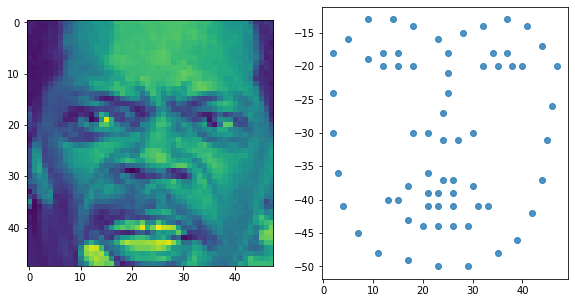

In [ ]:
# plotting landmarks
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 3, 1)
ax.imshow(img)
ax = fig.add_subplot(1, 3, 2)
ax.scatter(landmarks[:, 0], -landmarks[:, 1], alpha=0.8)
ax = fig.add_subplot(1, 3, 2)


plt.show()

In [ ]:
input_image = face_recognition.load_image_file("/content/data/images/train/angry/10.jpg")
#input_image

In [ ]:
facce_landmarks = face_recognition.face_landmarks(input_image)
facce_landmarks[0]


{'chin': [(2, 18),
  (2, 24),
  (2, 30),
  (3, 36),
  (4, 41),
  (7, 45),
  (11, 48),
  (17, 49),
  (23, 50),
  (29, 50),
  (35, 48),
  (39, 46),
  (42, 42),
  (44, 37),
  (45, 31),
  (46, 26),
  (47, 20)],
 'left_eyebrow': [(5, 16), (9, 13), (14, 13), (18, 14), (23, 16)],
 'right_eyebrow': [(28, 15), (32, 14), (37, 13), (41, 14), (44, 17)],
 'nose_bridge': [(25, 18), (25, 21), (25, 24), (24, 27)],
 'nose_tip': [(18, 30), (21, 30), (24, 31), (27, 31), (30, 30)],
 'left_eye': [(9, 19), (12, 18), (15, 18), (18, 20), (15, 20), (12, 20)],
 'right_eye': [(32, 20), (34, 18), (37, 18), (40, 20), (38, 20), (35, 20)],
 'top_lip': [(13, 40),
  (17, 38),
  (21, 36),
  (24, 37),
  (26, 37),
  (30, 38),
  (33, 41),
  (31, 41),
  (26, 39),
  (23, 39),
  (21, 39),
  (15, 40)],
 'bottom_lip': [(33, 41),
  (29, 44),
  (26, 44),
  (23, 44),
  (20, 44),
  (17, 43),
  (13, 40),
  (15, 40),
  (21, 41),
  (23, 41),
  (26, 41),
  (31, 41)]}

In [ ]:
lm_dic = facce_landmarks[0]
type(lm_dic)

dict

In [ ]:
lm_dic.keys()


dict_keys(['chin', 'left_eyebrow', 'right_eyebrow', 'nose_bridge', 'nose_tip', 'left_eye', 'right_eye', 'top_lip', 'bottom_lip'])

In [ ]:
# function for calculate the euclidean distance
def euclidean_dist(vector_x, vector_y):
    vector_x, vector_y = np.array(vector_x), np.array(vector_y)
    return np.sqrt(np.sum((vector_x - vector_y)**2, axis=-1))

In [ ]:
# euclidean distance between top lip and bottom lip
lip_dist = euclidean_dist(lm_dic['top_lip'] , lm_dic['bottom_lip'])
lip_dist

array([20.02498439, 13.41640786,  9.43398113,  7.07106781,  9.21954446,
       13.92838828, 20.02498439, 16.03121954,  5.38516481,  2.        ,
        5.38516481, 16.03121954])

In [ ]:
def cal_mean( vector_l) :
  x =0
  y =0
  for i in range(len(vector_l)) :
    x =  x + vector_l[i][0]
    x_mean = x/len(vector_l)
    y=  y + vector_l[i][1]
    y_mean = y/len(vector_l)
  return (x_mean , y_mean)

In [ ]:
cal_mean(lm_dic['left_eyebrow'])

(13.8, 14.4)

In [ ]:
lm_dic['left_eyebrow'] = lm_dic['left_eyebrow'] + [cal_mean(lm_dic['left_eyebrow'])]
lm_dic['left_eyebrow'] 

[(5, 16), (9, 13), (14, 13), (18, 14), (23, 16), (13.8, 14.4)]

In [ ]:

lm_dic['left_eyebrow']  = sorted( lm_dic['left_eyebrow'], key=itemgetter(0))
lm_dic['left_eyebrow'] 

[(5, 16), (9, 13), (13.8, 14.4), (14, 13), (18, 14), (23, 16)]

In [ ]:
left_eye_dist = euclidean_dist(lm_dic['left_eyebrow'] , lm_dic['left_eye'])
left_eye_dist

array([ 5.        ,  5.83095189,  3.79473319,  8.06225775,  6.70820393,
       11.70469991])

In [ ]:
cal_mean(lm_dic['right_eyebrow'])

(36.4, 14.6)

In [ ]:
lm_dic['right_eyebrow'] = lm_dic['right_eyebrow'] + [cal_mean(lm_dic['right_eyebrow'])]
lm_dic['right_eyebrow']

[(28, 15), (32, 14), (37, 13), (41, 14), (44, 17), (36.4, 14.6)]

In [ ]:

lm_dic['right_eyebrow']  = sorted( lm_dic['right_eyebrow'], key=itemgetter(0))
lm_dic['right_eyebrow'] 

[(28, 15), (32, 14), (36.4, 14.6), (37, 13), (41, 14), (44, 17)]

In [ ]:
right_eye_dist = euclidean_dist(lm_dic['right_eyebrow'] , lm_dic['right_eye'])
right_eye_dist

array([6.40312424, 4.47213595, 3.4525353 , 7.61577311, 6.70820393,
       9.48683298])

In [ ]:
columns=['lip_dist' + '_' + str(i)  for i in range(len(lip_dist)) ] + [ 'right_eye_dist' + '_' + str(i)  for i in range(len(right_eye_dist)) ] + ['left_eye_dist' + '_' + str(i)  for i in range(len(left_eye_dist)) ] + ['emotion']

In [ ]:
df=pd.DataFrame([] ,columns=columns)
df

,lip_dist_0,lip_dist_1,lip_dist_2,lip_dist_3,lip_dist_4,lip_dist_5,lip_dist_6,lip_dist_7,lip_dist_8,lip_dist_9,...,right_eye_dist_3,right_eye_dist_4,right_eye_dist_5,left_eye_dist_0,left_eye_dist_1,left_eye_dist_2,left_eye_dist_3,left_eye_dist_4,left_eye_dist_5,emotion


In [ ]:
ligne_1 = np.concatenate((lip_dist , right_eye_dist , left_eye_dist , ['angry'])  )
ligne_1

array(['20.024984394500787', '13.416407864998739', '9.433981132056603',
       '7.0710678118654755', '9.219544457292887', '13.92838827718412',
       '20.024984394500787', '16.0312195418814', '5.385164807134504',
       '2.0', '5.385164807134504', '16.0312195418814',
       '6.4031242374328485', '4.47213595499958', '3.452535300326414',
       '7.615773105863909', '6.708203932499369', '9.486832980505138',
       '5.0', '5.830951894845301', '3.7947331922020546',
       '8.06225774829855', '6.708203932499369', '11.704699910719626',
       'angry'], dtype='<U32')

In [ ]:
df = df.append(pd.Series(ligne_1, index=df.columns), ignore_index=True)
df

,lip_dist_0,lip_dist_1,lip_dist_2,lip_dist_3,lip_dist_4,lip_dist_5,lip_dist_6,lip_dist_7,lip_dist_8,lip_dist_9,...,right_eye_dist_3,right_eye_dist_4,right_eye_dist_5,left_eye_dist_0,left_eye_dist_1,left_eye_dist_2,left_eye_dist_3,left_eye_dist_4,left_eye_dist_5,emotion
0,20.024984394500787,13.416407864998739,9.433981132056603,7.0710678118654755,9.219544457292887,13.92838827718412,20.024984394500787,16.0312195418814,5.385164807134504,2.0,...,7.615773105863909,6.708203932499369,9.486832980505138,5.0,5.830951894845301,3.7947331922020546,8.06225774829855,6.708203932499369,11.704699910719626,angry


In [ ]:
print(len(ligne_1))

25


## for all the dataset

In [ ]:
# function 


def img_proc( img_path , facce_landmarks  , emotion) :
  
  


  lm_dic = facce_landmarks[0]

  lip_dist = euclidean_dist(lm_dic['top_lip'] , lm_dic['bottom_lip'])


  cal_mean(lm_dic['left_eyebrow'])
  lm_dic['left_eyebrow'] = lm_dic['left_eyebrow'] + [cal_mean(lm_dic['left_eyebrow'])]
  left_eye_dist = euclidean_dist(lm_dic['left_eyebrow'] , lm_dic['left_eye'])
  
  cal_mean(lm_dic['right_eyebrow'])
  lm_dic['right_eyebrow'] = lm_dic['right_eyebrow'] + [cal_mean(lm_dic['right_eyebrow'])]
  right_eye_dist = euclidean_dist(lm_dic['right_eyebrow'] , lm_dic['right_eye'])

  return( np.concatenate((lip_dist , right_eye_dist , left_eye_dist , [emotion])))
  




In [ ]:
emotions = os.listdir("/content/data/images/train/")
train_imgs = []
for emotion in emotions :
  train_files = glob.glob('/content/data/images/train/'+emotion+'/*')
  for img in train_files :
    input_image = face_recognition.load_image_file(img)
    facce_landmarks = face_recognition.face_landmarks(input_image)
    if ( len(facce_landmarks) != 0) :
      df = df.append(pd.Series(img_proc(img , facce_landmarks , emotion), index=df.columns), ignore_index=True)


In [ ]:
x_1 = df.drop(["emotion"] , axis=1 )
y_1 = df["emotion"]


In [ ]:

# Create a MinMaxScaler object
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
df_scaled = scaler.fit_transform(x_1)

# Convert the transformed data back into a dataframe
df_scaled = pd.DataFrame(df_scaled, columns=x_1.columns)


In [ ]:
df = pd.concat([df_scaled, y_1], axis=1)
df

,lip_dist_0,lip_dist_1,lip_dist_2,lip_dist_3,lip_dist_4,lip_dist_5,lip_dist_6,lip_dist_7,lip_dist_8,lip_dist_9,...,right_eye_dist_3,right_eye_dist_4,right_eye_dist_5,left_eye_dist_0,left_eye_dist_1,left_eye_dist_2,left_eye_dist_3,left_eye_dist_4,left_eye_dist_5,emotion
0,0.582757,0.505293,0.409674,0.349642,0.422134,0.537705,0.582757,0.500997,0.308130,0.124035,...,0.503524,0.383664,0.594271,0.326785,0.379662,0.163158,0.515208,0.401095,0.806307,angry
1,0.416811,0.321552,0.277272,0.252130,0.357607,0.373205,0.416811,0.319803,0.219449,0.062017,...,0.543557,0.478209,0.495357,0.512857,0.568161,0.551114,0.515208,0.625336,0.491291,angry
2,0.207757,0.206540,0.157509,0.148340,0.228934,0.180515,0.207757,0.184181,0.210799,0.062017,...,0.221658,0.350751,0.239812,0.090239,0.144634,0.224740,0.209933,0.281066,0.211532,angry
3,0.124654,0.140038,0.088815,0.110566,0.165087,0.129035,0.124654,0.136249,0.070266,0.000000,...,0.190363,0.270161,0.210859,0.126605,0.144634,0.281729,0.285564,0.339454,0.259082,angry
4,0.207757,0.274962,0.301700,0.349642,0.348702,0.260276,0.207757,0.227082,0.227849,0.186052,...,0.268987,0.293469,0.244868,0.269286,0.236155,0.224740,0.209933,0.183083,0.174581,angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19971,0.256186,0.289140,0.262453,0.203874,0.307148,0.278088,0.256186,0.280688,0.243975,0.062017,...,0.179325,0.293469,0.164528,0.174890,0.291904,0.203876,0.277890,0.243975,0.168109,happy
19972,0.338317,0.331905,0.234660,0.156365,0.228934,0.278088,0.338317,0.325432,0.151936,0.087706,...,0.089662,0.237118,0.164528,0.126605,0.144634,0.203876,0.169824,0.183083,0.099713,happy
19973,0.526935,0.551719,0.432286,0.407749,0.511913,0.586548,0.526935,0.534235,0.496240,0.316228,...,0.268987,0.414794,0.306735,0.326785,0.291904,0.348268,0.410272,0.441281,0.360034,happy
19974,0.508933,0.491724,0.369277,0.300773,0.357607,0.464863,0.508933,0.505235,0.339454,0.186052,...,0.190363,0.426808,0.240129,0.269286,0.291904,0.272727,0.342287,0.243975,0.164414,happy


In [ ]:

x = df.drop(["emotion"] , axis=1 )
y = df["emotion"]


In [ ]:
df.columns

Index(['lip_dist_0', 'lip_dist_1', 'lip_dist_2', 'lip_dist_3', 'lip_dist_4',
       'lip_dist_5', 'lip_dist_6', 'lip_dist_7', 'lip_dist_8', 'lip_dist_9',
       'lip_dist_10', 'lip_dist_11', 'right_eye_dist_0', 'right_eye_dist_1',
       'right_eye_dist_2', 'right_eye_dist_3', 'right_eye_dist_4',
       'right_eye_dist_5', 'left_eye_dist_0', 'left_eye_dist_1',
       'left_eye_dist_2', 'left_eye_dist_3', 'left_eye_dist_4',
       'left_eye_dist_5', 'emotion'],
      dtype='object')

In [ ]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

In [ ]:
# Fitting the classifier into the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(x_train,y_train)



RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [ ]:
# Predicting the test set results

Y_Pred = classifier.predict(x_test)



In [ ]:
# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_Pred)

In [ ]:
cm

array([[147,   0,  16, 126, 167,  30,  37],
       [  4,  15,   2,  17,  14,   5,   4],
       [ 36,   0,  76, 120, 171,  34,  84],
       [ 56,   0,  10, 896, 118,  18,  31],
       [ 43,   0,  14,  95, 522,  57,  34],
       [ 44,   0,  12,  96, 264,  89,  22],
       [ 17,   0,  24,  42,  48,   5, 334]])

## Evaluation

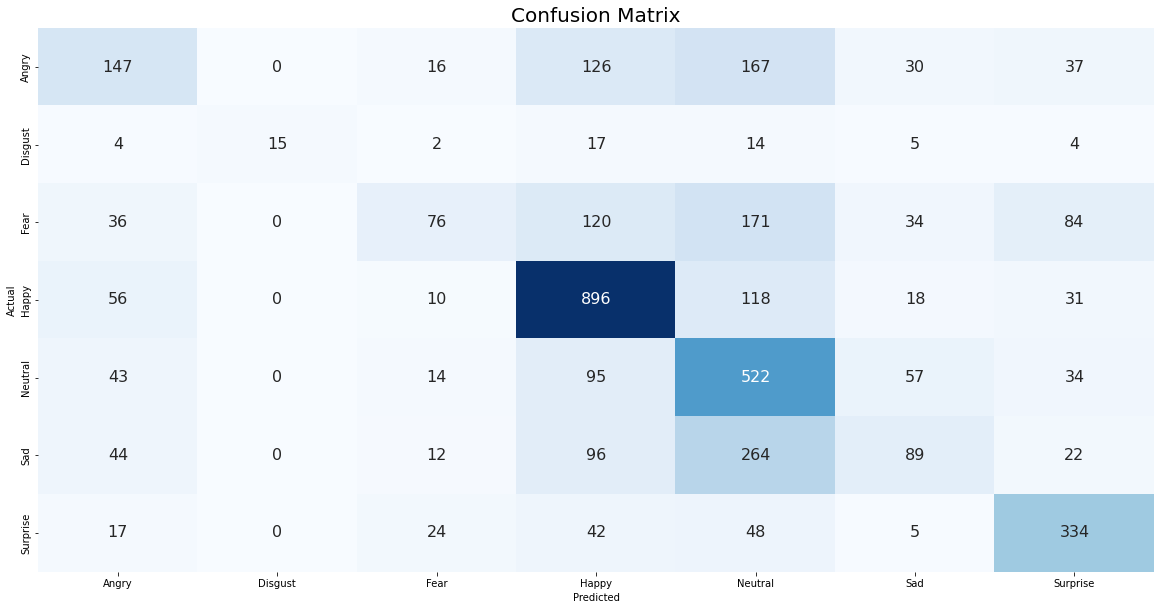

In [ ]:

     
labels = ['Angry','Disgust' ,'Fear', 'Happy' ,'Neutral', 'Sad' , 'Surprise' ]
from sklearn.metrics import confusion_matrix
cm_data = confusion_matrix(y_test , Y_Pred)
cm = pd.DataFrame(cm_data, columns=labels, index = labels)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (20,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

In [ ]:
# accuency score 

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

classifier_train = round(classifier.score(x_train, y_train) * 100, 2)
classifier_accuracy = round(accuracy_score(Y_Pred, y_test) * 100, 2)
classifier_f1 = f1_score(Y_Pred, y_test , average=None) * 100

print("Training Accuracy    :",classifier_train,"%")
print("\033[1m---------------------------------\033[0m")
print("Model Accuracy Score :",classifier_accuracy,"%")

# print(classifier_f1)

Training Accuracy    : 99.86 %
---------------------------------
Model Accuracy Score : 52.03 %


# **3. Create a DL model for distinguishing Emotions**

Define configuration options

In [ ]:

img_rows , img_cols = 48,48
picture_size = 48
batch_size  = 512
n_epochs= 10
n_classes =7
val_split = 0.3
verbosity = 1
train_path = "/content/data/images/train/" 
val_path = "/content/data/images/validation/" 
input_shape = (img_rows, img_cols, 3)
labels = ['angry','disgust' ,'fear', 'happy' ,'neutral', 'sad' , 'surprise' ]
seed = 10

## advancd model

In [ ]:
batch_size  = 512

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(train_path,
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


val_set = datagen_val.flow_from_directory(val_path,
                                           target_size = (picture_size,picture_size),
                                           color_mode = "grayscale",
                                           batch_size=batch_size,
                                           class_mode='categorical',
                                           shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
model = Sequential()

# 1st convolution layer
model.add(Conv2D(64, input_shape=(48, 48, 1), kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, padding='same', kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Dropout(0.3))

# 2nd convolution layer
model.add(Conv2D(128, padding='same', kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, padding='same', kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Dropout(0.3))

# 3rd convolution layer
model.add(Conv2D(256, padding='same', kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, padding='same', kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Dropout(0.3))

# 4th convolution layer
model.add(Conv2D(512, padding='same', kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, padding='same', kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Dropout(0.3))

# Fully connected layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(7, activation='softmax'))

In [ ]:
# Compile the model
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


In [ ]:

# Summary the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 46, 46, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                        

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          #min_delta=0,
                          patience=10,
                          #verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=5)
                              #verbose=1,
                              #min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 60

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

Train the model

In [ ]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                verbose = 2 ,
                                validation_data = val_set,
                                validation_steps = val_set.n//val_set.batch_size,
                                callbacks=callbacks_list
                                )

<ipython-input-47-3a1be0bf7dfd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/60


56/56 - 37s - loss: 2.0169 - accuracy: 0.2111 - val_loss: 1.8799 - val_accuracy: 0.1650 - lr: 0.0010 - 37s/epoch - 652ms/step
Epoch 2/60


56/56 - 17s - loss: 1.8020 - accuracy: 0.2487 - val_loss: 1.7979 - val_accuracy: 0.2715 - lr: 0.0010 - 17s/epoch - 299ms/step
Epoch 3/60


56/56 - 17s - loss: 1.6915 - accuracy: 0.3112 - val_loss: 1.6160 - val_accuracy: 0.3456 - lr: 0.0010 - 17s/epoch - 311ms/step
Epoch 4/60


56/56 - 17s - loss: 1.5810 - accuracy: 0.3750 - val_loss: 1.6383 - val_accuracy: 0.3726 - lr: 0.0010 - 17s/epoch - 309ms/step
Epoch 5/60


56/56 - 18s - loss: 1.4701 - accuracy: 0.4210 - val_loss: 1.4133 - val_accuracy: 0.4364 - lr: 0.0010 - 18s/epoch - 313ms/step
Epoch 6/60


56/56 - 18s - loss: 1.3940 - accuracy: 0.4607 - val_loss: 1.4246 - val_accuracy: 0.4474 - lr: 0.0010 - 18s/epoch - 315ms/step
Epoch 7/60


56/56 - 17s - loss: 1.3298 - accuracy: 0.4898 - val_loss: 1.3483 - val_accuracy: 0.4766 - lr: 0.0010 - 17s/epoch - 312ms/step
Epoch 8/60


56/56 - 17s - loss: 1.2751 - accuracy: 0.5163 - val_loss: 1.2805 - val_accuracy: 0.5002 - lr: 0.0010 - 17s/epoch - 311ms/step
Epoch 9/60


56/56 - 18s - loss: 1.2166 - accuracy: 0.5419 - val_loss: 1.3771 - val_accuracy: 0.4707 - lr: 0.0010 - 18s/epoch - 313ms/step
Epoch 10/60


56/56 - 18s - loss: 1.1822 - accuracy: 0.5575 - val_loss: 1.2020 - val_accuracy: 0.5302 - lr: 0.0010 - 18s/epoch - 315ms/step
Epoch 11/60


56/56 - 18s - loss: 1.1380 - accuracy: 0.5798 - val_loss: 1.1948 - val_accuracy: 0.5502 - lr: 0.0010 - 18s/epoch - 316ms/step
Epoch 12/60


56/56 - 18s - loss: 1.1028 - accuracy: 0.5878 - val_loss: 1.1517 - val_accuracy: 0.5636 - lr: 0.0010 - 18s/epoch - 313ms/step
Epoch 13/60


56/56 - 18s - loss: 1.0641 - accuracy: 0.6021 - val_loss: 1.2319 - val_accuracy: 0.5511 - lr: 0.0010 - 18s/epoch - 313ms/step
Epoch 14/60


56/56 - 18s - loss: 1.0250 - accuracy: 0.6173 - val_loss: 1.0784 - val_accuracy: 0.5951 - lr: 0.0010 - 18s/epoch - 313ms/step
Epoch 15/60


56/56 - 17s - loss: 0.9903 - accuracy: 0.6348 - val_loss: 1.0984 - val_accuracy: 0.5882 - lr: 0.0010 - 17s/epoch - 310ms/step
Epoch 16/60


56/56 - 17s - loss: 0.9684 - accuracy: 0.6451 - val_loss: 1.1202 - val_accuracy: 0.5858 - lr: 0.0010 - 17s/epoch - 311ms/step
Epoch 17/60


56/56 - 18s - loss: 0.9384 - accuracy: 0.6562 - val_loss: 1.1778 - val_accuracy: 0.5777 - lr: 0.0010 - 18s/epoch - 314ms/step
Epoch 18/60


56/56 - 18s - loss: 0.9048 - accuracy: 0.6663 - val_loss: 1.0852 - val_accuracy: 0.6038 - lr: 0.0010 - 18s/epoch - 314ms/step
Epoch 19/60


56/56 - 17s - loss: 0.8707 - accuracy: 0.6798 - val_loss: 1.0646 - val_accuracy: 0.6121 - lr: 0.0010 - 17s/epoch - 312ms/step
Epoch 20/60


56/56 - 17s - loss: 0.8479 - accuracy: 0.6889 - val_loss: 1.0742 - val_accuracy: 0.6118 - lr: 0.0010 - 17s/epoch - 310ms/step
Epoch 21/60


56/56 - 17s - loss: 0.8080 - accuracy: 0.7056 - val_loss: 1.1223 - val_accuracy: 0.6019 - lr: 0.0010 - 17s/epoch - 310ms/step
Epoch 22/60


56/56 - 17s - loss: 0.7931 - accuracy: 0.7117 - val_loss: 1.1540 - val_accuracy: 0.6050 - lr: 0.0010 - 17s/epoch - 309ms/step
Epoch 23/60


56/56 - 17s - loss: 0.7362 - accuracy: 0.7337 - val_loss: 1.1822 - val_accuracy: 0.6065 - lr: 0.0010 - 17s/epoch - 312ms/step
Epoch 24/60


56/56 - 18s - loss: 0.7041 - accuracy: 0.7442 - val_loss: 1.1731 - val_accuracy: 0.5983 - lr: 0.0010 - 18s/epoch - 313ms/step
Epoch 25/60


56/56 - 17s - loss: 0.6042 - accuracy: 0.7817 - val_loss: 1.0525 - val_accuracy: 0.6534 - lr: 2.0000e-04 - 17s/epoch - 311ms/step
Epoch 26/60


56/56 - 17s - loss: 0.5342 - accuracy: 0.8059 - val_loss: 1.0808 - val_accuracy: 0.6529 - lr: 2.0000e-04 - 17s/epoch - 309ms/step
Epoch 27/60


56/56 - 17s - loss: 0.4923 - accuracy: 0.8212 - val_loss: 1.1717 - val_accuracy: 0.6612 - lr: 2.0000e-04 - 17s/epoch - 310ms/step
Epoch 28/60


56/56 - 17s - loss: 0.4673 - accuracy: 0.8318 - val_loss: 1.1463 - val_accuracy: 0.6618 - lr: 2.0000e-04 - 17s/epoch - 312ms/step
Epoch 29/60


56/56 - 17s - loss: 0.4318 - accuracy: 0.8432 - val_loss: 1.2198 - val_accuracy: 0.6576 - lr: 2.0000e-04 - 17s/epoch - 312ms/step
Epoch 30/60


56/56 - 17s - loss: 0.4138 - accuracy: 0.8504 - val_loss: 1.2607 - val_accuracy: 0.6591 - lr: 2.0000e-04 - 17s/epoch - 311ms/step
Epoch 31/60


56/56 - 17s - loss: 0.3781 - accuracy: 0.8650 - val_loss: 1.2677 - val_accuracy: 0.6612 - lr: 4.0000e-05 - 17s/epoch - 310ms/step
Epoch 32/60


56/56 - 17s - loss: 0.3728 - accuracy: 0.8665 - val_loss: 1.2741 - val_accuracy: 0.6650 - lr: 4.0000e-05 - 17s/epoch - 309ms/step
Epoch 33/60


56/56 - 17s - loss: 0.3626 - accuracy: 0.8698 - val_loss: 1.2877 - val_accuracy: 0.6665 - lr: 4.0000e-05 - 17s/epoch - 310ms/step
Epoch 34/60


56/56 - 18s - loss: 0.3526 - accuracy: 0.8739 - val_loss: 1.3123 - val_accuracy: 0.6674 - lr: 4.0000e-05 - 18s/epoch - 313ms/step
Epoch 35/60


56/56 - 17s - loss: 0.3393 - accuracy: 0.8782 - val_loss: 1.3406 - val_accuracy: 0.6677 - lr: 4.0000e-05 - 17s/epoch - 309ms/step


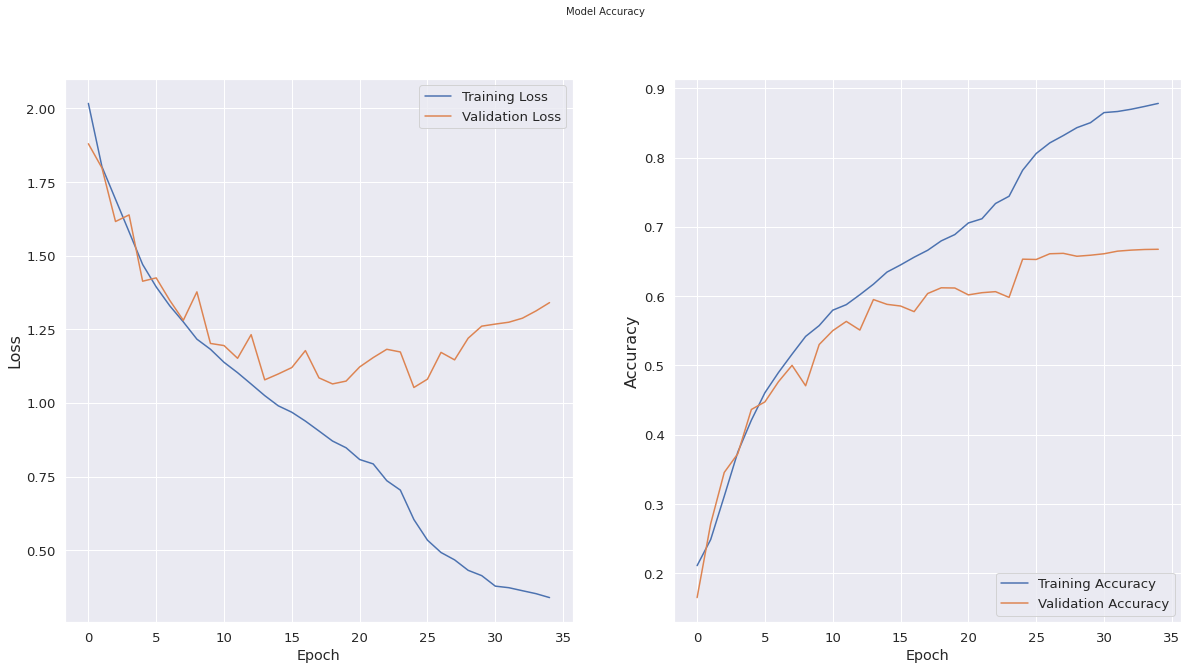

In [ ]:
# Show Loss diagram
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Model Accuracy', fontsize=10)
plt.xlabel('Epoch')
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')


# Show accuracy diagram
plt.subplot(1, 2, 2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## improved model


increasing the contrast

In [ ]:
emotions = os.listdir("/content/data/images/train/")
for emotion in emotions :
  train_files = glob.glob('/content/data/images/train/'+emotion+'/*')
  for img in train_files :
    pic = PIL.Image.open(img)
    pic_sharp = pic.filter(PIL.ImageFilter.UnsharpMask(radius=2, percent=100))
    pic_sharp.save(img)


Loading Images using ImageGeneratorClass

In [ ]:
# hedi teb3a el improving 

# Create ImageDataGenerators for training and validation and testing
train_datagen = ImageDataGenerator(
    validation_split = val_split,
    rescale=1.0/255.0,
	  width_shift_range=0.1, 
    height_shift_range=0.1, 
    horizontal_flip=True,
    fill_mode="nearest"
    
)

val_datagen = ImageDataGenerator(
    #validation_split = val_split,
    rescale=1.0/255.0,
  	width_shift_range=0.1, 
    height_shift_range=0.1, 
    horizontal_flip=True,
    fill_mode="nearest"
)



In [ ]:
batch_size  = 512

# use the labels defined before to 
# find number of images belonging to each category
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (picture_size,picture_size),
    color_mode = "grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size = (picture_size,picture_size),
    color_mode = "grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)



Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = val_generator,
                                validation_steps = val_generator.n//val_generator.batch_size,
                                callbacks=callbacks_list
                                )

<ipython-input-52-07391f173642>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/60
56/56 [==============================] - ETA: 0s - loss: 1.2658 - accuracy: 0.5932

56/56 [==============================] - 26s 470ms/step - loss: 1.2658 - accuracy: 0.5932 - val_loss: 2.9867 - val_accuracy: 0.1342 - lr: 8.0000e-06
Epoch 2/60
56/56 [==============================] - ETA: 0s - loss: 1.1743 - accuracy: 0.6027

56/56 [==============================] - 25s 443ms/step - loss: 1.1743 - accuracy: 0.6027 - val_loss: 2.2518 - val_accuracy: 0.2438 - lr: 8.0000e-06
Epoch 3/60
56/56 [==============================] - ETA: 0s - loss: 1.1287 - accuracy: 0.6086

56/56 [==============================] - 25s 442ms/step - loss: 1.1287 - accuracy: 0.6086 - val_loss: 1.9907 - val_accuracy: 0.2413 - lr: 8.0000e-06
Epoch 4/60
56/56 [==============================] - ETA: 0s - loss: 1.1122 - accuracy: 0.6105

56/56 [==============================] - 25s 439ms/step - loss: 1.1122 - accuracy: 0.6105 - val_loss: 1.9677 - val_accuracy: 0.2366 - lr: 8.0000e-06
Epoch 5/60
56/56 [==============================] - ETA: 0s - loss: 1.0932 - accuracy: 0.6138

56/56 [==============================] - 26s 453ms/step - loss: 1.0932 - accuracy: 0.6138 - val_loss: 2.0912 - val_accuracy: 0.1717 - lr: 8.0000e-06
Epoch 6/60
56/56 [==============================] - ETA: 0s - loss: 1.0861 - accuracy: 0.6171

56/56 [==============================] - 25s 440ms/step - loss: 1.0861 - accuracy: 0.6171 - val_loss: 2.2656 - val_accuracy: 0.1723 - lr: 8.0000e-06
Epoch 7/60
56/56 [==============================] - ETA: 0s - loss: 1.0750 - accuracy: 0.6187

56/56 [==============================] - 25s 448ms/step - loss: 1.0750 - accuracy: 0.6187 - val_loss: 2.2877 - val_accuracy: 0.1711 - lr: 8.0000e-06
Epoch 8/60
56/56 [==============================] - ETA: 0s - loss: 1.0713 - accuracy: 0.6140

56/56 [==============================] - 25s 453ms/step - loss: 1.0713 - accuracy: 0.6140 - val_loss: 2.2291 - val_accuracy: 0.1737 - lr: 8.0000e-06
Epoch 9/60
56/56 [==============================] - ETA: 0s - loss: 1.0648 - accuracy: 0.6225

56/56 [==============================] - 25s 440ms/step - loss: 1.0648 - accuracy: 0.6225 - val_loss: 2.1429 - val_accuracy: 0.1764 - lr: 8.0000e-06
Epoch 10/60
56/56 [==============================] - ETA: 0s - loss: 1.0572 - accuracy: 0.6268

56/56 [==============================] - 27s 483ms/step - loss: 1.0572 - accuracy: 0.6268 - val_loss: 2.0445 - val_accuracy: 0.1986 - lr: 1.6000e-06
Epoch 11/60
56/56 [==============================] - ETA: 0s - loss: 1.0662 - accuracy: 0.6200

56/56 [==============================] - 25s 437ms/step - loss: 1.0662 - accuracy: 0.6200 - val_loss: 1.9441 - val_accuracy: 0.2311 - lr: 1.6000e-06
Epoch 12/60
56/56 [==============================] - ETA: 0s - loss: 1.0464 - accuracy: 0.6248

56/56 [==============================] - 25s 441ms/step - loss: 1.0464 - accuracy: 0.6248 - val_loss: 1.8431 - val_accuracy: 0.2817 - lr: 1.6000e-06
Epoch 13/60
56/56 [==============================] - ETA: 0s - loss: 1.0594 - accuracy: 0.6217

56/56 [==============================] - 26s 462ms/step - loss: 1.0594 - accuracy: 0.6217 - val_loss: 1.7135 - val_accuracy: 0.3508 - lr: 1.6000e-06
Epoch 14/60
56/56 [==============================] - ETA: 0s - loss: 1.0571 - accuracy: 0.6251

56/56 [==============================] - 25s 435ms/step - loss: 1.0571 - accuracy: 0.6251 - val_loss: 1.5702 - val_accuracy: 0.4205 - lr: 1.6000e-06
Epoch 15/60
56/56 [==============================] - ETA: 0s - loss: 1.0514 - accuracy: 0.6266

56/56 [==============================] - 26s 464ms/step - loss: 1.0514 - accuracy: 0.6266 - val_loss: 1.4441 - val_accuracy: 0.4648 - lr: 1.6000e-06
Epoch 16/60
56/56 [==============================] - ETA: 0s - loss: 1.0580 - accuracy: 0.6223

56/56 [==============================] - 26s 462ms/step - loss: 1.0580 - accuracy: 0.6223 - val_loss: 1.3528 - val_accuracy: 0.5074 - lr: 1.6000e-06
Epoch 17/60
56/56 [==============================] - ETA: 0s - loss: 1.0552 - accuracy: 0.6271

56/56 [==============================] - 26s 467ms/step - loss: 1.0552 - accuracy: 0.6271 - val_loss: 1.2866 - val_accuracy: 0.5296 - lr: 1.6000e-06
Epoch 18/60
56/56 [==============================] - ETA: 0s - loss: 1.0473 - accuracy: 0.6290

56/56 [==============================] - 25s 439ms/step - loss: 1.0473 - accuracy: 0.6290 - val_loss: 1.2476 - val_accuracy: 0.5424 - lr: 1.6000e-06
Epoch 19/60
56/56 [==============================] - ETA: 0s - loss: 1.0491 - accuracy: 0.6211

56/56 [==============================] - 25s 448ms/step - loss: 1.0491 - accuracy: 0.6211 - val_loss: 1.2076 - val_accuracy: 0.5587 - lr: 1.6000e-06
Epoch 20/60
56/56 [==============================] - ETA: 0s - loss: 1.0482 - accuracy: 0.6253

56/56 [==============================] - 25s 439ms/step - loss: 1.0482 - accuracy: 0.6253 - val_loss: 1.2172 - val_accuracy: 0.5571 - lr: 1.6000e-06
Epoch 21/60
56/56 [==============================] - ETA: 0s - loss: 1.0454 - accuracy: 0.6270

56/56 [==============================] - 25s 437ms/step - loss: 1.0454 - accuracy: 0.6270 - val_loss: 1.2086 - val_accuracy: 0.5637 - lr: 1.6000e-06
Epoch 22/60
56/56 [==============================] - ETA: 0s - loss: 1.0414 - accuracy: 0.6267

56/56 [==============================] - 25s 439ms/step - loss: 1.0414 - accuracy: 0.6267 - val_loss: 1.1991 - val_accuracy: 0.5646 - lr: 1.6000e-06
Epoch 23/60
56/56 [==============================] - ETA: 0s - loss: 1.0464 - accuracy: 0.6279

56/56 [==============================] - 25s 436ms/step - loss: 1.0464 - accuracy: 0.6279 - val_loss: 1.1998 - val_accuracy: 0.5651 - lr: 1.6000e-06
Epoch 24/60
56/56 [==============================] - ETA: 0s - loss: 1.0403 - accuracy: 0.6281

56/56 [==============================] - 25s 441ms/step - loss: 1.0403 - accuracy: 0.6281 - val_loss: 1.1844 - val_accuracy: 0.5639 - lr: 1.6000e-06
Epoch 25/60
56/56 [==============================] - ETA: 0s - loss: 1.0438 - accuracy: 0.6273

56/56 [==============================] - 25s 435ms/step - loss: 1.0438 - accuracy: 0.6273 - val_loss: 1.1992 - val_accuracy: 0.5613 - lr: 1.6000e-06
Epoch 26/60
56/56 [==============================] - ETA: 0s - loss: 1.0493 - accuracy: 0.6254

56/56 [==============================] - 24s 440ms/step - loss: 1.0493 - accuracy: 0.6254 - val_loss: 1.1853 - val_accuracy: 0.5685 - lr: 1.6000e-06
Epoch 27/60
56/56 [==============================] - ETA: 0s - loss: 1.0453 - accuracy: 0.6265

56/56 [==============================] - 25s 437ms/step - loss: 1.0453 - accuracy: 0.6265 - val_loss: 1.1753 - val_accuracy: 0.5726 - lr: 1.6000e-06
Epoch 28/60
56/56 [==============================] - ETA: 0s - loss: 1.0449 - accuracy: 0.6248

56/56 [==============================] - 26s 459ms/step - loss: 1.0449 - accuracy: 0.6248 - val_loss: 1.1969 - val_accuracy: 0.5545 - lr: 1.6000e-06
Epoch 29/60
56/56 [==============================] - ETA: 0s - loss: 1.0438 - accuracy: 0.6247

56/56 [==============================] - 25s 444ms/step - loss: 1.0438 - accuracy: 0.6247 - val_loss: 1.1836 - val_accuracy: 0.5678 - lr: 1.6000e-06
Epoch 30/60
56/56 [==============================] - ETA: 0s - loss: 1.0434 - accuracy: 0.6240

56/56 [==============================] - 25s 440ms/step - loss: 1.0434 - accuracy: 0.6240 - val_loss: 1.1905 - val_accuracy: 0.5690 - lr: 1.6000e-06
Epoch 31/60
56/56 [==============================] - ETA: 0s - loss: 1.0458 - accuracy: 0.6250

56/56 [==============================] - 25s 443ms/step - loss: 1.0458 - accuracy: 0.6250 - val_loss: 1.1936 - val_accuracy: 0.5685 - lr: 1.6000e-06
Epoch 32/60
56/56 [==============================] - ETA: 0s - loss: 1.0324 - accuracy: 0.6280

56/56 [==============================] - 25s 440ms/step - loss: 1.0324 - accuracy: 0.6280 - val_loss: 1.1890 - val_accuracy: 0.5669 - lr: 1.6000e-06
Epoch 33/60
56/56 [==============================] - ETA: 0s - loss: 1.0390 - accuracy: 0.6303

56/56 [==============================] - 25s 439ms/step - loss: 1.0390 - accuracy: 0.6303 - val_loss: 1.1792 - val_accuracy: 0.5627 - lr: 3.2000e-07
Epoch 34/60
56/56 [==============================] - ETA: 0s - loss: 1.0373 - accuracy: 0.6306

56/56 [==============================] - 25s 442ms/step - loss: 1.0373 - accuracy: 0.6306 - val_loss: 1.1879 - val_accuracy: 0.5685 - lr: 3.2000e-07
Epoch 35/60
56/56 [==============================] - ETA: 0s - loss: 1.0366 - accuracy: 0.6314

56/56 [==============================] - 25s 439ms/step - loss: 1.0366 - accuracy: 0.6314 - val_loss: 1.1883 - val_accuracy: 0.5631 - lr: 3.2000e-07
Epoch 36/60
56/56 [==============================] - ETA: 0s - loss: 1.0392 - accuracy: 0.6304

56/56 [==============================] - 25s 438ms/step - loss: 1.0392 - accuracy: 0.6304 - val_loss: 1.1814 - val_accuracy: 0.5599 - lr: 3.2000e-07
Epoch 37/60
56/56 [==============================] - ETA: 0s - loss: 1.0372 - accuracy: 0.6282

56/56 [==============================] - 26s 456ms/step - loss: 1.0372 - accuracy: 0.6282 - val_loss: 1.1798 - val_accuracy: 0.5726 - lr: 3.2000e-07


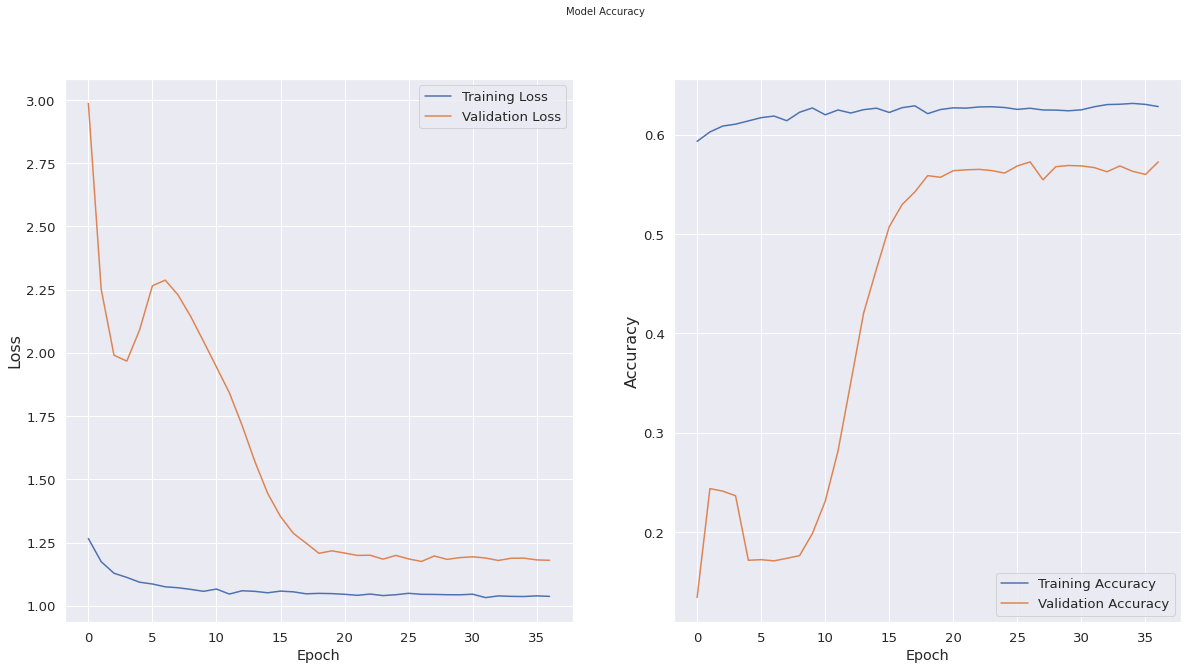

In [ ]:
# Show Loss diagram
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Model Accuracy', fontsize=10)
plt.xlabel('Epoch')
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')


# Show accuracy diagram
plt.subplot(1, 2, 2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## Evaluation

In [ ]:
model.evaluate(val_generator)
preds = model.predict(val_generator)
y_preds = np.argmax(preds , axis = 1 )
y_test = np.array(val_generator.labels)

14/14 [==============================] - 5s 309ms/step


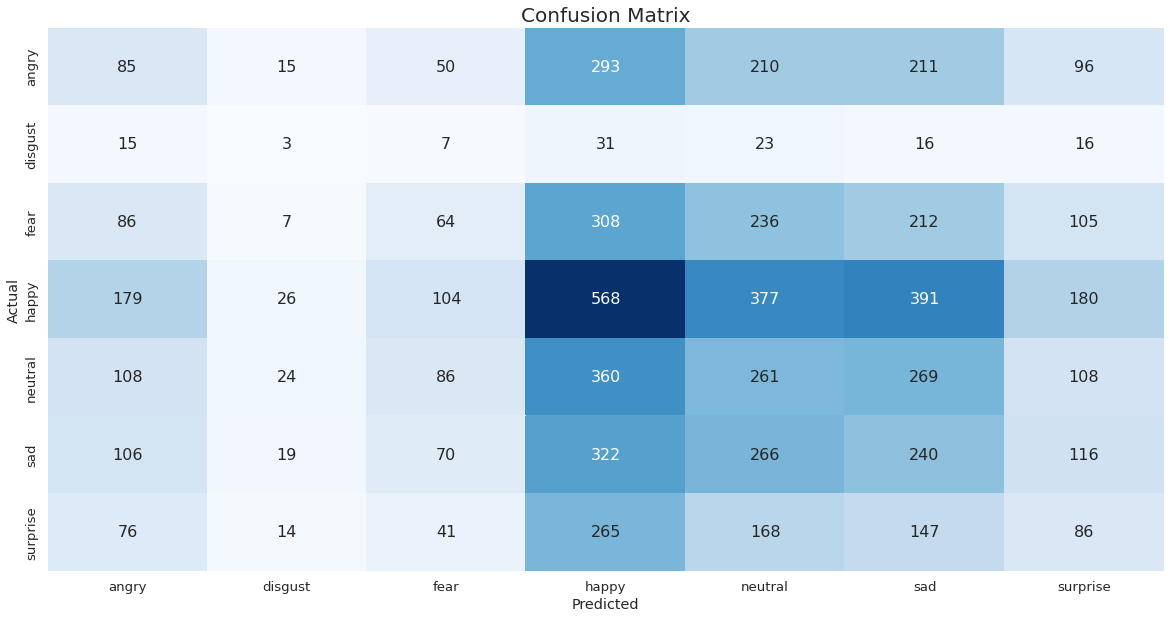

In [ ]:
from sklearn.metrics import confusion_matrix
cm_data = confusion_matrix(y_test , y_preds)
cm = pd.DataFrame(cm_data, columns=labels, index = labels)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (20,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

## Prediction

In [ ]:
from tensorflow.keras.preprocessing import image

def predict_facial_expression(image_path):
    """Predict facial expression for image"""
    # Open image
    rgb_image = image.load_img(path=image_path,
                            color_mode='grayscale',
                            target_size=(48, 48))
    # Convert to array
    rgb_array = image.img_to_array(rgb_image)
    rgb_array = np.expand_dims(rgb_array, axis=0)

    # Show image
    rgb_display = np.array(rgb_array, 'float32')
    rgb_display = rgb_display.reshape([48, 48]);
    plt.imshow(rgb_display, cmap='gray')
    plt.show()

    # Make predictions
    rgb_array = rgb_array / 255.0
    prediction = model.predict(rgb_array)


    y_pos = np.arange(len(labels))
    # Draw the histogram
    plt.bar(y_pos, prediction[0], align='center', alpha=0.5)
    plt.xticks(y_pos, labels)
    plt.ylabel('Percentage')
    plt.title('Facial Expression Prediction')
    plt.show()

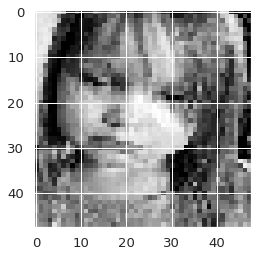

1/1 [==============================] - 0s 16ms/step


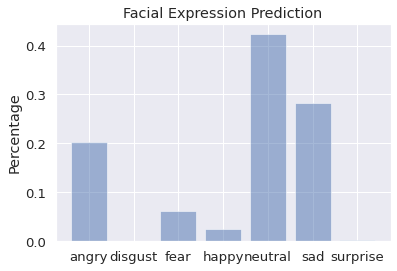

In [ ]:
# Sad

predict_facial_expression("/content/pic1.jfif")

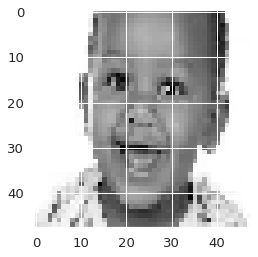

1/1 [==============================] - 0s 15ms/step


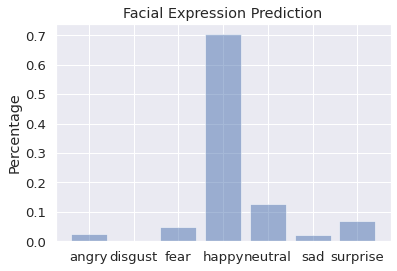

In [ ]:
# happy

predict_facial_expression("/content/pic2.jfif")

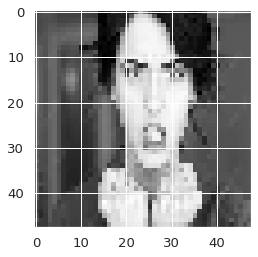

1/1 [==============================] - 0s 15ms/step


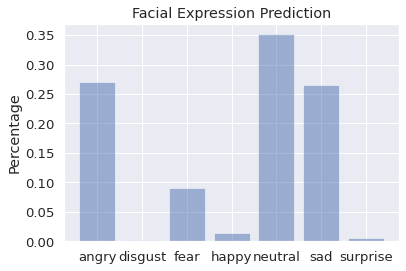

In [ ]:
# angry

predict_facial_expression("/content/pic3.jpg")

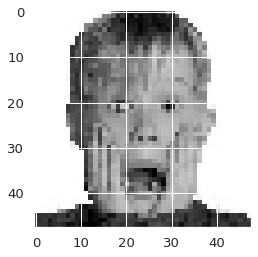

1/1 [==============================] - 0s 16ms/step


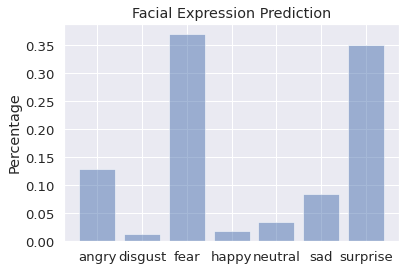

In [ ]:
# fear

predict_facial_expression("/content/pic4.jpg")

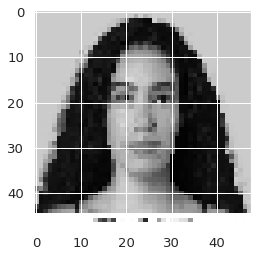

1/1 [==============================] - 0s 16ms/step


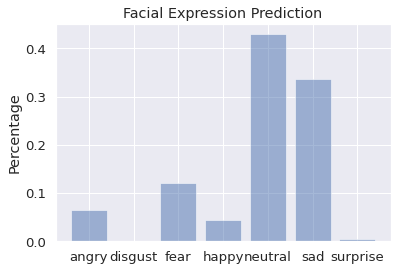

In [ ]:
# neutral

predict_facial_expression("/content/pic5.jfif")

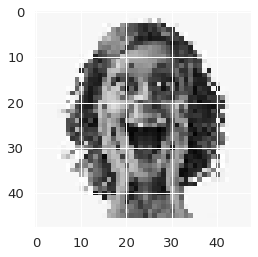

1/1 [==============================] - 0s 15ms/step


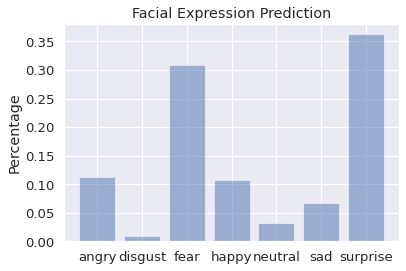

In [ ]:
# surprised

predict_facial_expression("/content/pic6.jfif")